Mean Squared Error: 0.004998521490119225


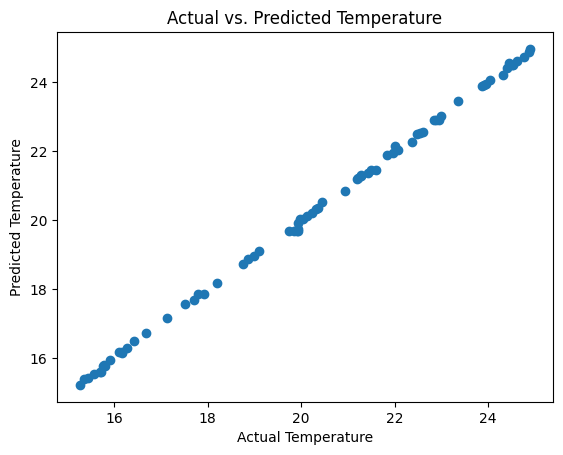

In [ ]:
# Q NO 1
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Simulate IoT home sensor data
np.random.seed(42)

# Create a DataFrame for simulated sensor data
data = pd.DataFrame({
    'Timestamp': pd.date_range('2023-01-01', periods=365, freq='D'),
    'SensorID': np.random.randint(1, 11, size=365),
    'Temperature': 15 + 10 * np.random.rand(365),
    'Humidity': np.random.rand(365),
    'LightIntensity': np.random.rand(365),
    'SoundLevel': np.random.rand(365)
})

# Feature engineering: Calculate daily averages and temperature difference
daily_avg = data.groupby(['SensorID', 'Timestamp']).mean().reset_index()
daily_avg['TempDiff'] = daily_avg.groupby('SensorID')['Temperature'].diff().fillna(0)

# Prepare data for machine learning
features = ['Temperature', 'Humidity', 'LightIntensity', 'SoundLevel', 'TempDiff']
X = daily_avg[features]
y = daily_avg['Temperature']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot actual vs. predicted temperatures
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Actual vs. Predicted Temperature')
plt.show()
